In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import GlobalMaxPooling1D, Dense, Input
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/TensorFlow2.0/Datasets/humor detection/dataset.csv')

In [6]:
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [7]:
df.columns = ['data', 'target']
df.head()

,data,target
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [8]:
set(df['target'])

{False, True}

In [9]:
len(df['data'])

200000

In [10]:
x = []
for i in df['target']:
  if str(i)=='True': x = x+[1];
  elif str(i)=='False': x = x+[0];
print(x)
df['target'] = np.array(x)
df.head()

[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

,data,target
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",0
1,Watch: darvish gave hitter whiplash with slow ...,0
2,What do you call a turtle without its shell? d...,1
3,5 reasons the 2016 election feels so personal,0
4,"Pasco police shot mexican migrant from behind,...",0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], df['target'], test_size=0.35)

In [12]:
MAX_VOCAB_SIZE = 65000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

In [13]:
v = len(tokenizer.word_index)
v

62720

In [14]:
len(tokenizer.word_counts)

62720

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
seq_train = pad_sequences(seq_train)
seq_test = pad_sequences(seq_test, maxlen = seq_train.shape[1])

In [16]:
# Defining the layers in the model

# *** Callback learning rate scheduler ***

def scheduler(epoch, lr):
  if epoch<=5:
    return lr
  elif epoch>5:
    return lr*10**-1;

lrcallBack = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

# *** Callback lr schedular ***

i = Input(shape=(seq_train.shape[1],))
x = Embedding(v+1, 40)(i)                      # Definging a vector of length 40 for each word
x = LSTM(30, return_sequences=True)(x)         # LSTM layer with 30 hidden units
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)          # sigmoid activation for binary classification

model = Model(i, x)

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),                     #  ***   try:     tf.keras.optimizers.SGD(learning_rate=0.01)
    loss='binary_crossentropy',
    metrics=['accuracy']
)
r = model.fit(
    seq_train, 
    y_train,
    epochs=15,
    validation_data=(seq_test, y_test),
    # callbacks = [lrcallBack]      Using a call is optional,  
    # make sure to change the scheduler function and epochs 
    # accordingly
)

Epoch 1/15
4063/4063 [==============================] - 53s 13ms/step - loss: 0.6580 - accuracy: 0.6495 - val_loss: 0.5753 - val_accuracy: 0.7224
Epoch 2/15
4063/4063 [==============================] - 51s 12ms/step - loss: 0.4101 - accuracy: 0.8215 - val_loss: 0.2778 - val_accuracy: 0.8935
Epoch 3/15
4063/4063 [==============================] - 50s 12ms/step - loss: 0.2586 - accuracy: 0.9000 - val_loss: 0.2300 - val_accuracy: 0.9142
Epoch 4/15
4063/4063 [==============================] - 51s 12ms/step - loss: 0.2226 - accuracy: 0.9150 - val_loss: 0.2058 - val_accuracy: 0.9224
Epoch 5/15
4063/4063 [==============================] - 51s 13ms/step - loss: 0.2007 - accuracy: 0.9233 - val_loss: 0.1918 - val_accuracy: 0.9274
Epoch 6/15
4063/4063 [==============================] - 51s 13ms/step - loss: 0.1851 - accuracy: 0.9293 - val_loss: 0.1822 - val_accuracy: 0.9306
Epoch 7/15
4063/4063 [==============================] - 51s 13ms/step - loss: 0.1735 - accuracy: 0.9344 - val_loss: 0.2209 -

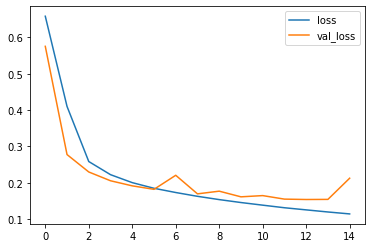

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

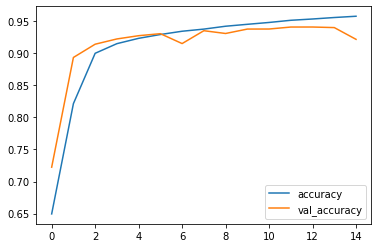

In [19]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [21]:
model.save(filepath='/content/drive/MyDrive/TensorFlow2.0')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TensorFlow2.0/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TensorFlow2.0/assets
